<a href="https://colab.research.google.com/github/surajpreetham/Data_science_codes/blob/main/Unsupervised_Learning_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree

In [ ]:
retail = pd.read_csv(r'OnlineRetail.csv',sep=",",encoding="ISO-8859-1",header=0)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
retail.shape

(541909, 8)

In [ ]:
retail.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  Custom

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Data Cleaning

In [ ]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
retail = retail.dropna(subset=['Description'])

In [ ]:
retail = retail.dropna(subset=['CustomerID'])

In [ ]:
retail.shape

(406829, 8)

In [ ]:
retail['CustomerID'] = retail['CustomerID'].astype(str)

In [ ]:
retail['Amount'] = retail['UnitPrice']*retail['Quantity']

In [ ]:
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID','Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
rfm = pd.merge(rfm_m,rfm_f,on='CustomerID',how='inner')
rfm

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


In [ ]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format="%d-%m-%Y %H:%M")
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
max_date = max(retail['InvoiceDate'])
retail['Diff'] = max_date - retail['InvoiceDate']

In [ ]:
rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p['Diff'] = rfm_p['Diff'].dt.days


In [ ]:
rfm = pd.merge(rfm,rfm_p,on='CustomerID',how='inner')
rfm.head()

,CustomerID,Amount,Frequency,Diff
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [ ]:
rfm.columns = ['CustomerID','Amount','Frequency','Recency']

Outlier detection


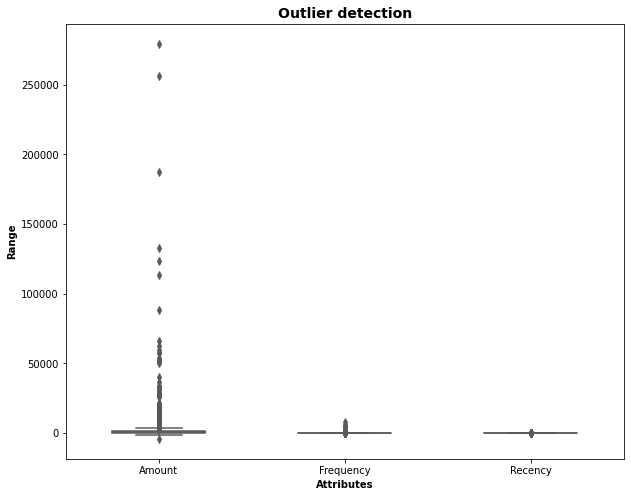

In [ ]:
attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes],orient='v',palette='Set2',whis=1.5,saturation=1,width=0.5)
plt.title('Outlier detection',fontsize=14,fontweight='bold')
plt.ylabel("Range",fontweight='bold')
plt.xlabel("Attributes",fontweight='bold')
plt.show()

Inter Quartile Range

In [ ]:
q3 = rfm.Amount.quantile(0.95)
q1 = rfm.Amount.quantile(0.05)

IQR = q3-q1

rfm = rfm[(rfm.Amount>= q1-1.5*IQR) & (rfm.Amount<=q3+1.5*IQR)]

#Removing statistical Outliers for recency
q3 = rfm.Recency.quantile(0.95)
q1 = rfm.Recency.quantile(0.05)

IQR = q3-q1

rfm = rfm[(rfm.Recency>= q1-1.5*IQR) & (rfm.Recency<=q3+1.5*IQR)]

#Removing statistical Outliers for frequency
q3 = rfm.Frequency.quantile(0.95)
q1 = rfm.Frequency.quantile(0.05)

IQR = q3-q1

rfm = rfm[(rfm.Frequency>= q1-1.5*IQR) & (rfm.Frequency<=q3+1.5*IQR)]

In [ ]:
rfm_df  = rfm[['Amount','Frequency','Recency']]
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount','Frequency','Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


Building the model

In [ ]:
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [ ]:
kmeans.labels_

array([0, 1, 2, ..., 0, 2, 2], dtype=int32)

Elbow name to get the right number of clusters

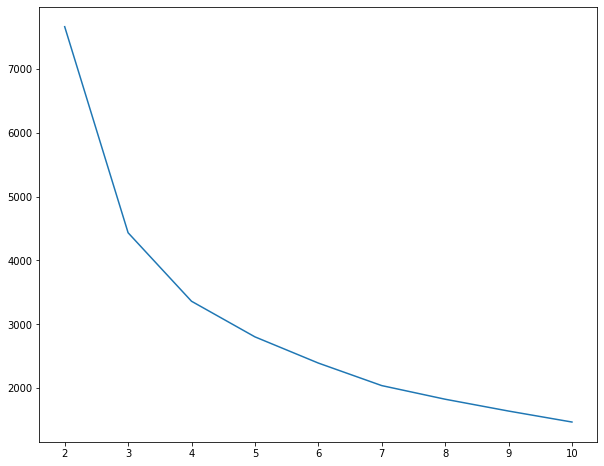

In [ ]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
  kmeans.fit(rfm_df_scaled)

  ssd.append(kmeans.inertia_)

plt.plot(range_n_clusters,ssd)

In [ ]:
kmeans = KMeans(n_clusters=3,max_iter = 50)
kmeans.fit(rfm_df_scaled)

kmeans.labels_


array([0, 2, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
rfm['Cluster_ID'] = kmeans.labels_

In [ ]:
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_ID
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,0


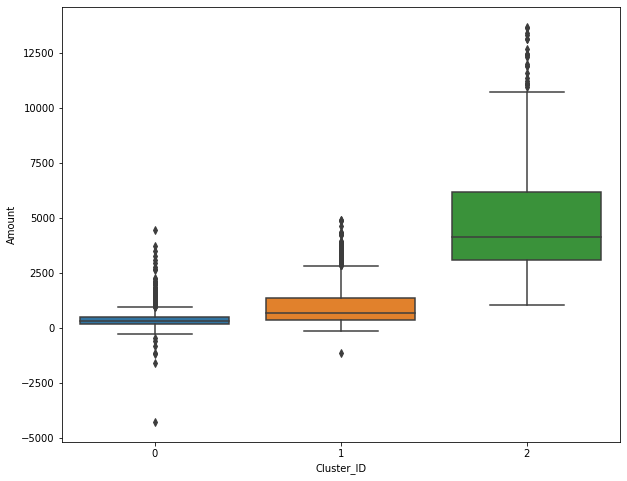

In [ ]:
sns.boxplot(x='Cluster_ID',y='Amount',data=rfm)

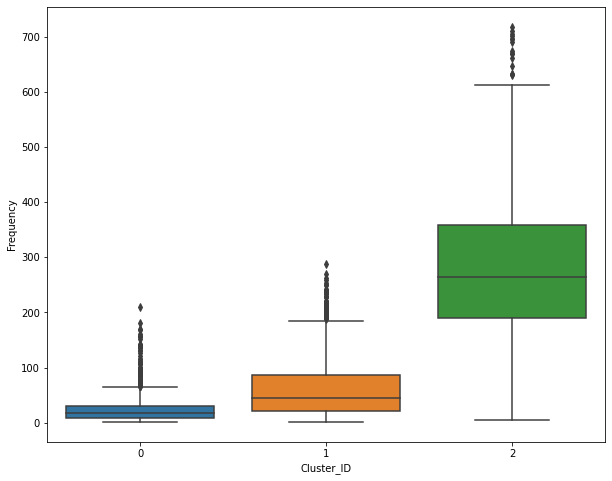

In [ ]:
sns.boxplot(x='Cluster_ID',y='Frequency',data=rfm)

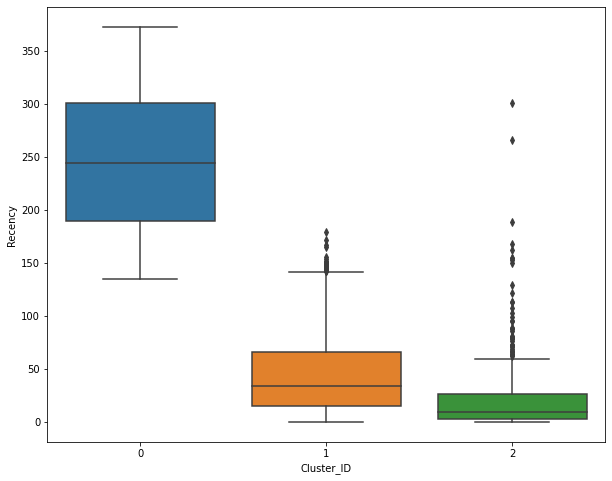

In [ ]:
sns.boxplot(x='Cluster_ID',y='Recency',data=rfm)

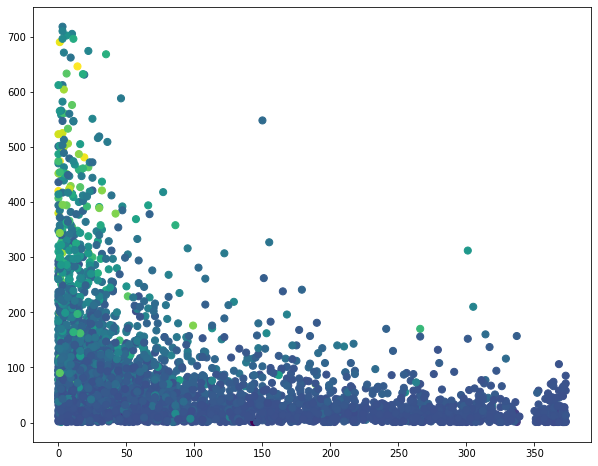

In [ ]:
plt.scatter(rfm.loc[:,'Recency'],rfm.loc[:,'Frequency'],c = rfm.loc[:,'Amount'],s=50,cmap='viridis')

In [ ]:
from scipy.cluster.hierarchy import dendrogram

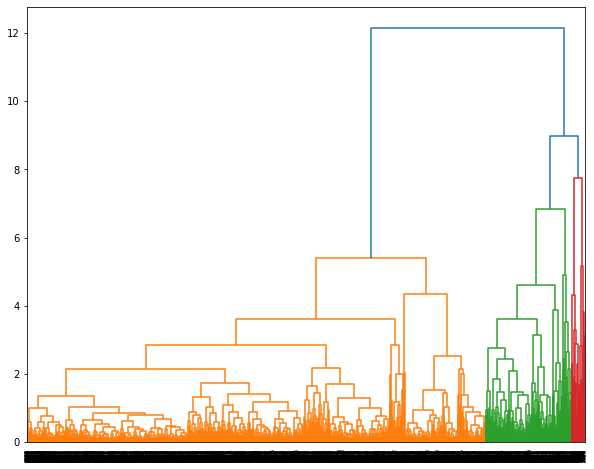

In [ ]:
mergings = linkage(rfm_df_scaled,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

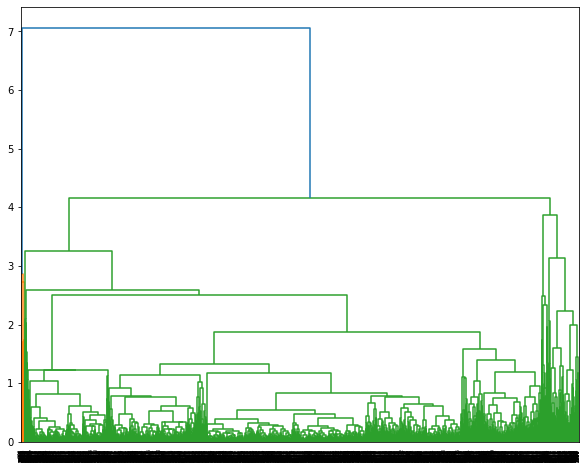

In [ ]:
mergings = linkage(rfm_df_scaled,method='average',metric='euclidean')
dendrogram(mergings)
plt.show()

Cutting the dendrogram based on K points

In [ ]:
cluster_labels = cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
rfm['Cluster_labels'] = cluster_labels
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_ID,Cluster_labels
0,12346.0,0.00,2,325,0,0
1,12347.0,4310.00,182,1,2,0
2,12348.0,1797.24,31,74,1,0
3,12349.0,1757.55,73,18,1,0
4,12350.0,334.40,17,309,0,0


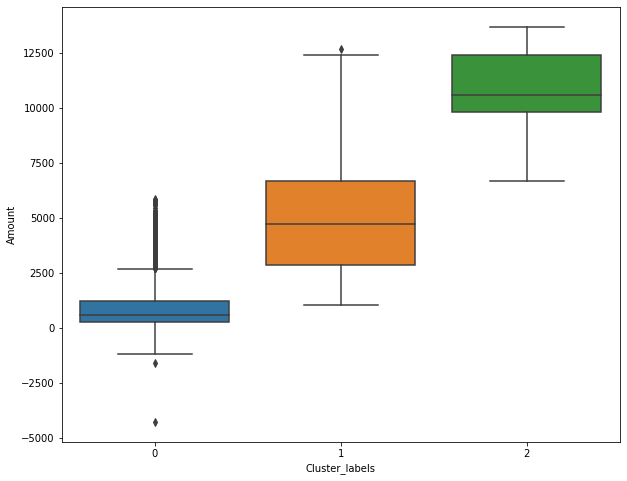

In [ ]:
sns.boxplot(x='Cluster_labels',y='Amount',data=rfm)

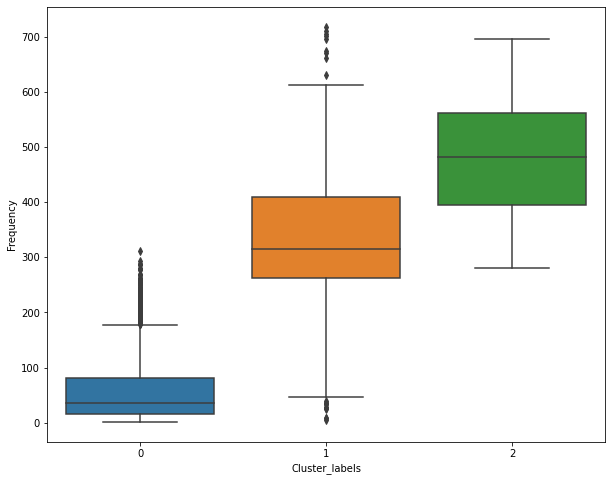

In [ ]:
sns.boxplot(x='Cluster_labels',y='Frequency',data=rfm)

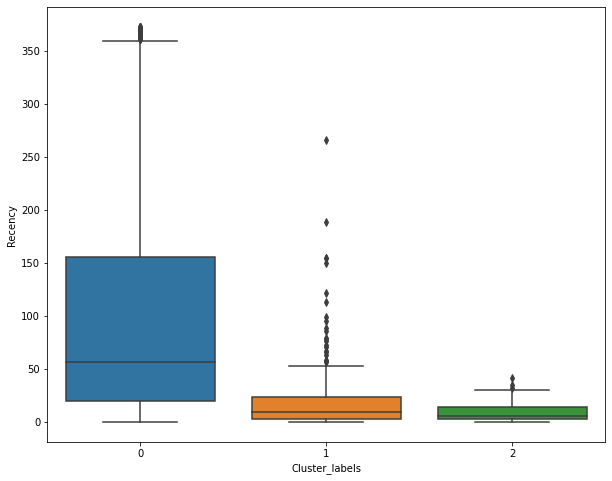

In [ ]:
sns.boxplot(x='Cluster_labels',y='Recency',data=rfm)

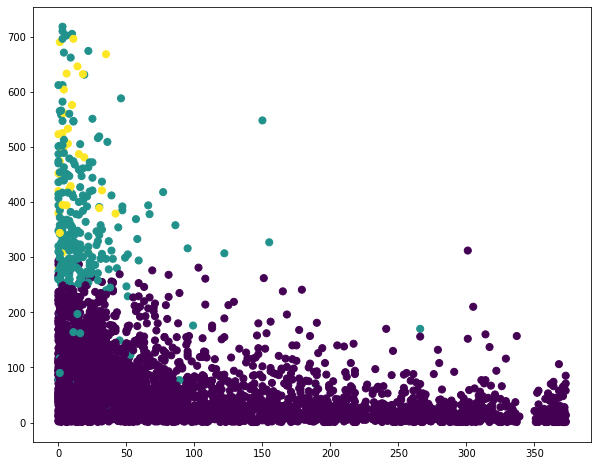

In [ ]:
plt.scatter(rfm.loc[:,'Recency'],rfm.loc[:,'Frequency'],c=rfm.loc[:,'Cluster_labels'],s=50,cmap='viridis')

